Import libraries

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from pandas.core.common import random_state
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Read file

In [ ]:
df= pd.read_csv("Salary_Data.csv")
df.head()

,YearsExperience,Salary
0,8,84620.05366
1,11,142591.25590
2,28,97800.25540
3,29,96834.67128
4,25,132157.78620


Analyse dataframe

In [ ]:
df.describe()

,YearsExperience,Salary
count,1000.000000,1000.000000
mean,14.771000,105558.404238
std,8.341111,28256.972074
min,1.000000,33510.510670
25%,7.000000,85032.141520
50%,15.000000,104314.518300
75%,22.000000,126804.047550
max,29.000000,193016.602100


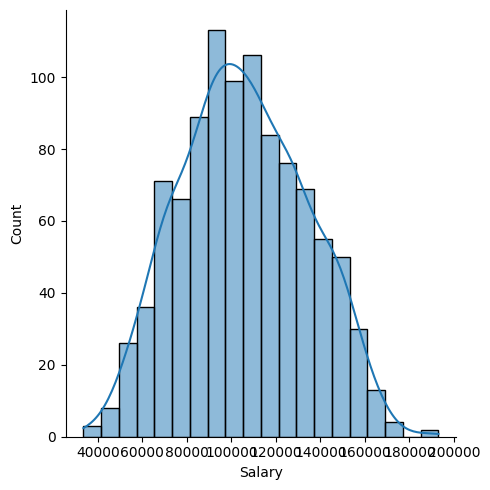

In [ ]:
sns.displot(df['Salary'],kde=True)

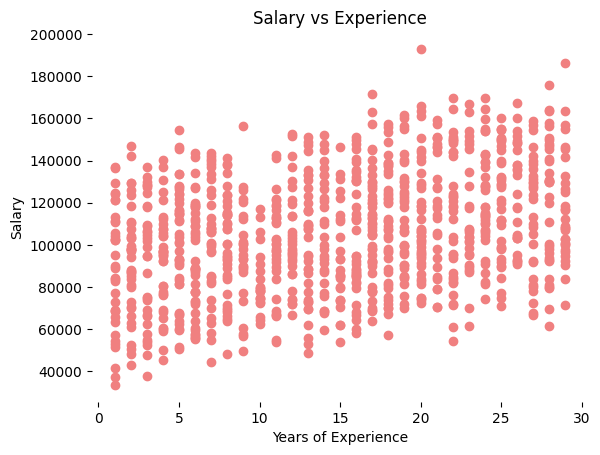

In [ ]:
plt.scatter(df['YearsExperience'], df['Salary'], color = 'lightcoral')
plt.title('Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.box(False)
plt.show()

Define dependent and independent variables

In [ ]:
X = df.iloc[:, :1]
y = df.iloc[:, 1:]

Split dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, y_train.shape, X_test.shape,y_test.shape

((800, 1), (800, 1), (200, 1), (200, 1))

Define model

In [ ]:
regressor = LinearRegression().fit(X_train, y_train)
regressor.score(X_train, y_train)

0.10155253179720836

Make predictions

In [ ]:
y_test = np.array(y_test).reshape(-1)
y_test.ndim

1

In [ ]:
y_pred_test = regressor.predict(X_test)
y_pred_train = regressor.predict(X_train)

y_pred_test = np.array(y_pred_test).reshape(-1)

df=pd.DataFrame({'Actual': y_test, 'Predicted':y_pred_test})
df

,Actual,Predicted
0,86677.84011,103509.691360
1,56036.16301,95960.042831
2,92226.87182,106745.255016
3,100710.08810,94881.521613
4,91775.01283,117530.467200
...,...,...
195,62915.44568,91645.957957
196,92041.74999,118608.988419
197,85534.39749,105666.733797
198,164373.96750,115373.424763


Visualise predictions

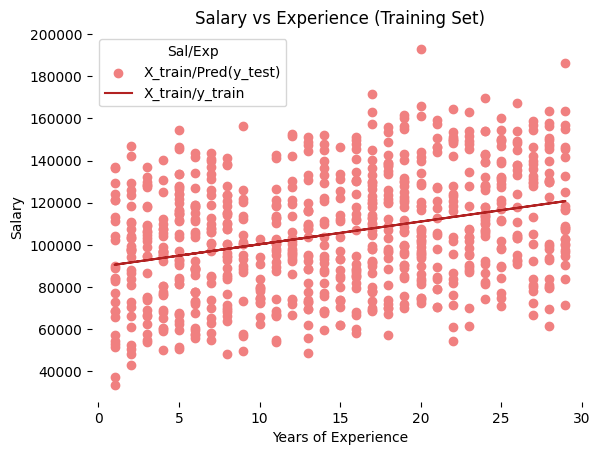

In [ ]:
plt.scatter(X_train, y_train, color = 'lightcoral')
plt.plot(X_train, y_pred_train, color = 'firebrick')
plt.title('Salary vs Experience (Training Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend(['X_train/Pred(y_test)', 'X_train/y_train'], title = 'Sal/Exp', loc='best', facecolor='white')
plt.box(False)
plt.show()

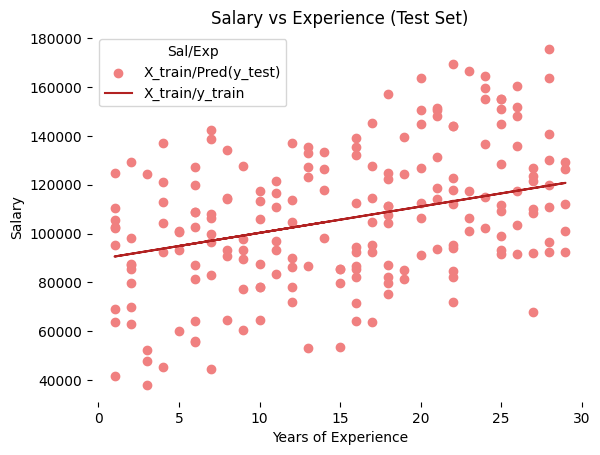

In [ ]:
plt.scatter(X_test, y_test, color = 'lightcoral')
plt.plot(X_train, y_pred_train, color = 'firebrick')
plt.title('Salary vs Experience (Test Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend(['X_train/Pred(y_test)', 'X_train/y_train'], title = 'Sal/Exp', loc='best', facecolor='white')
plt.box(False)
plt.show()

In [ ]:
print(f'Coefficient: {regressor.coef_}')
print(f'Intercept: {regressor.intercept_}')

Coefficient: [[1078.52121847]]
Intercept: [89488.9155203]


Calculate error

In [ ]:
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
rmse

25996.125723838428

In [ ]:
score = regressor.score(X_test, y_test)
score

0.17234957251912686